[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_4_AprendizajeAutomatico/notebook/ML_to_DL.ipynb)

<h1><center>Resumen Aprendizaje Máquina</center></h1>

1. Machine Learning
* Supervised Learning
  * EDA
  * Pre-procesing Data
  * Cross Validation (CV)
  * Hyperparameter Tuning
  * Regression
  * Classification
  

* Unsupervised Learning
  * Clustering
  * Standardization
  * Dimension Reduction

----

### KMEANS

Probemos nuestro primer método no supervisado que es KMeans.

Clúster de KMeans: el algoritmo funciona de forma iterativa para asignar cada punto de datos a uno de los K grupos según las características que se proporcionan. Los puntos de datos se agrupan según la similitud de características

KMeans (n_clusters = 2): n_clusters = 2 significa que crean 2 clústeres

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

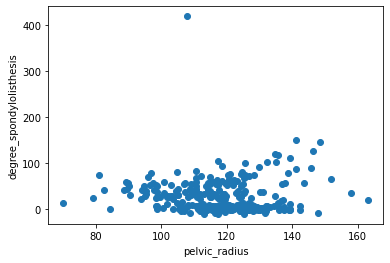

In [13]:
# As you can see there is no labels in data
data = pd.read_csv('../data/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

In [3]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


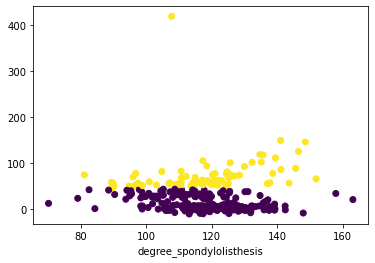

In [5]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

### EVALUACIÓN DEL AGRUPAMIENTO

Agrupamos los datos en dos grupos. Okey, ¿es la agrupación correcta? Para evaluar la agrupación utilizaremos una tabla de tabulación cruzada.

* Hay dos grupos que son 0 y 1
  * La primera clase 0 incluye 138 pacientes anormales y 100 normales
  * La segunda clase 1 incluye 72 pacientes anormales y 0 normales 
  
  * La mayoría de dos grupos son pacientes anormales.



In [6]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


La nueva pregunta es que sabemos cuántos datos de clase se incluyen, pero ¿qué pasa si el número de clase no se conoce en los datos? Esto es como un hiperparámetro en KNN o regresiones.

* inercia: qué tan dispersos están los grupos a distancia de cada muestra
* menor inercia significa más ramificaciones
* ¿Cuál es el mejor número de clústeres? **Hay poca inercia y no hay demasiadas compensaciones de clústeres, por lo que podemos elegir "codo" (elbow)**

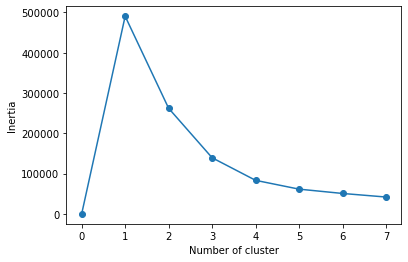

In [7]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

### ESTANDARIZACIÓN

La estandarización es importante tanto para el aprendizaje supervisado como no supervisado.
* No olvides la estandarización como preprocesamiento

Como ya hemos visualizado los datos, entendiste la idea. Ahora podemos usar todas las funciones para la agrupación en clústeres.

In [9]:
data = pd.read_csv('../data/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

<AxesSubplot:>

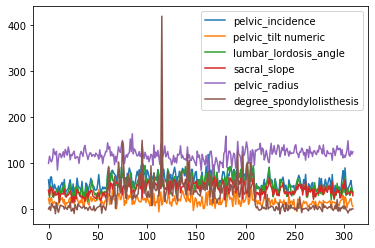

In [10]:
data3.plot()

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             94      90
1            116      10


In [21]:
data3

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [13]:
df

,labels,class
0,1,Abnormal
1,1,Abnormal
2,0,Abnormal
3,0,Abnormal
4,1,Abnormal
...,...,...
305,1,Normal
306,1,Normal
307,1,Normal
308,1,Normal


### JERARQUÍA

* Las líneas verticales son grupos
* altura en el dendograma: distancia entre el grupo de fusión
* method = 'single': puntos más cercanos de los clústeres

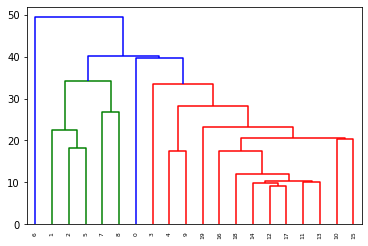

In [14]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

### T - Incrustación de vecinos estocásticos distribuidos (T - SNE)

* tasa de aprendizaje: 50-200 en normal
* fit_transform: es tanto fit como transform. t-sne solo tiene fit_transform
* Las variedades tienen la misma posición entre sí

In [18]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]

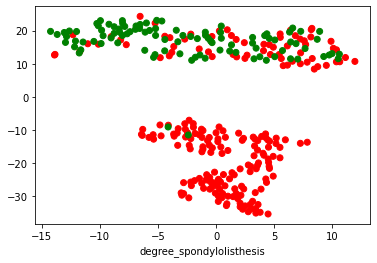

In [20]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

<h1><center>De ML a DL - Redes neuronales</center></h1>
* Aprendizaje profundo: una de las técnicas de aprendizaje automático que aprende características directamente de los datos.
* ¿Por qué el aprendizaje profundo?: cuando se aumenta la cantidad de datos, las técnicas de aprendizaje automático son insuficientes en términos de rendimiento y el aprendizaje profundo proporciona un mejor rendimiento, como la precisión.

![img](https://preview.ibb.co/d3CEOH/1.png)

### ¿Qué es una gran cantidad?:

Es difícil de responder, pero intuitivamente 1 millón de muestras es suficiente para decir "gran cantidad de datos".

Campos de uso del aprendizaje profundo: reconocimiento de voz, clasificación de imágenes, procesión del lenguaje natural (pnl) o sistemas de recomendación

¿Cuál es la diferencia entre el aprendizaje profundo y el aprendizaje automático?

* El aprendizaje automático cubre el aprendizaje profundo.
* Las funciones se proporcionan al aprendizaje automático de forma manual.
* Por otro lado, el aprendizaje profundo aprende características directamente de los datos.

![img](https://i.ibb.co/R6TVyyQ/2.png)

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings

### Resumen del conjunto de datos

Usaremos "conjunto de datos de dígitos del lenguaje de señas" para este ejercicio.
    
En estos datos hay 2062 imágenes de dígitos en lenguaje de señas.

Pero por fines prácticos se usarán alrededor de 205 muestras para cada clase...

(-0.5, 63.5, 63.5, -0.5)

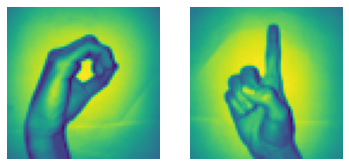

In [11]:
# load data set
x_l = np.load('../data/X.npy')
Y_l = np.load('../data/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

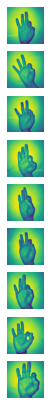

In [81]:
plt.subplots(figsize=(8, 8))
for i in range(1,10):
    plt.subplot(10, 1, i)
    plt.imshow(x_l[i].reshape(img_size, img_size))
    plt.axis('off')

In [82]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


La forma de la X es (410, 64, 64)
* 410 significa que tenemos 410 imágenes (signos cero y uno)
* 64 significa que nuestro tamaño de imagen es 64x64 (64x64 píxeles)

La forma de la Y es (410,1)
* 410 significa que tenemos 410 etiquetas (0 y 1)

Dividamos X y Y en conjuntos de prueba y de entrenamiento.

* test_size = porcentaje del tamaño de la prueba. prueba = 15% y entrenamiento = 75%
* random_state = usa la misma semilla mientras aleatoriza. Significa que si llamamos a train_test_split repetidamente, siempre crea el mismo entrenamiento y prueba porque tenemos el mismo random_state.



In [33]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Ahora tenemos una matriz de entrada tridimensional (X), por lo que debemos aplanarla (2D) para usarla como entrada para nuestro primer modelo de aprendizaje profundo.

* Nuestra matriz de etiquetas (Y) ya está plana (2D), así que la dejamos así.
* Vamos a aplanar la matriz X (matriz de imágenes).

In [34]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


Como podemos ver, tenemos 348 imágenes y cada imagen tiene 4096 píxeles en una matriz de tren de imágenes.

* Además, tenemos 62 imágenes y cada imagen tiene 4096 píxeles en la matriz de prueba de imágenes.
* Entonces tomemos la transposición. Puede decir ¿POR QUÉ?, en realidad no hay una respuesta técnica. Solo escribo el código (código que verá las partes próximas) de acuerdo con él :)

In [83]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


Lo que hicimos hasta este punto:

* Elegir nuestras etiquetas (clases) que tienen el signo cero y el signo uno
* Crear y aplanar los conjuntos de entrenamiento y prueba
* Nuestras entradas finales (imágenes) y salidas (etiquetas o clases) se ven así:

![img](https://image.ibb.co/fOqCSc/3.png)

### Regresión logística

Cuando hablamos de clasificación binaria (salidas 0 y 1) lo primero que nos viene a la mente debería ser la regresión logística.
Sin embargo, en este punto...  ¿qué hacer con la regresión logística?

---

La respuesta es que la regresión logística es en realidad una red neuronal muy simple. Por cierto, la red neuronal y el aprendizaje profundo son lo mismo. Cuando lleguemos a la red neuronal artificial, explicaré detalladamente los términos como "profundo".

---

Para comprender la regresión logística (aprendizaje profundo simple), primero aprendamos el gráfico de cálculo.

### Gráfico de cálculo

Las gráficas de cálculo son una buena forma de pensar en expresiones matemáticas. Es como la visualización de expresiones matemáticas.
    
Por ejemplo tenemos
    $$c = \sqrt{a2 + b2}$$

Su gráfico computacional es este. Como puede ver, expresamos matemáticas con gráficas.

![img](https://image.ibb.co/hWn6Lx/d.jpg)

Ahora veamos el gráfico de cálculo de regresión logística.

![img](https://i.ibb.co/9Hvb2Yf/5.jpg)

Los parámetros son ponderación (peso) y sesgo (bias).

* Pesos: coeficientes de cada píxel
* Sesgo: intercepto

* $z = (w.t) x + b => z$ es igual a (transposición de pesos por entrada x) + sesgo

* En otro dicho => $z = b + px1w1 + px2w2 + ... + px4096 * w4096$

* y_head = sigmoide (z)

* La función sigmoide hace que $z$ esté entre cero y uno, por lo que es probabilidad. Puede ver la función sigmoide en el gráfico de cálculo.

¿Por qué utilizamos la función sigmoidal?

* Da resultado probabilístico
* Es derivado, por lo que podemos usarlo en el algoritmo de descenso de gradiente.

Hagamos un ejemplo:

    Digamos que encontramos z = 4 y ponemos z en función sigmoide. El resultado (y_head) es casi 0,9. Significa que nuestro resultado de clasificación es 1 con un 90% de probabilidad.

Ahora comencemos desde el principio y examinemos cada componente del gráfico de cálculo con más detalle.

### Inicializando parámetros

Como saben, la entrada son nuestras imágenes que tiene 4096 píxeles (cada imagen en x_train). Cada píxel tiene su propio peso. El primer paso es multiplicar cada píxel con su propio peso.

* La pregunta es cuál es el valor inicial de los pesos.
  * Hay algunas técnicas que explicaré en la red neuronal artificial, pero para este momento los pesos iniciales son 0.01.
  * Okey, los pesos son 0.01 pero ¿cuál es la forma de la matriz de pesos? Como puede comprender del gráfico de cálculo de la regresión logística, es (4096,1)
  * También el sesgo inicial es 0.
  
Escribamos algo de código. Para utilizar en temas venideros como la red neuronal artificial (ANN), hago una definición (método).

In [36]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [37]:
w,b = initialize_weights_and_bias(4096)

In [85]:
b

0.0

### Propagación hacia adelante

Todos los pasos desde los píxeles hasta el costo se denominan propagación hacia adelante.
* $z = (w.T) x + b =>$ en esta ecuación sabemos que x es una matriz de píxeles, sabemos w (pesos) y b (sesgo), por lo que el resto es cálculo. (T es transponer)

* Luego ponemos z en la función sigmoide que devuelve y_head (probabilidad).
* Ccalculamos la función de pérdida (error).
* La función de costo es la suma de todas las pérdidas (error).
* Comencemos con z y la definición sigmoide (método) que toma z como parámetro de entrada y devuelve y_head (probabilidad)

In [87]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [96]:
y_head = sigmoid(100000)
y_head

1.0

Mientras escribimos el método sigmoide y calculamos y_head. 

Aprendamos qué es la función de pérdida (error)...

---
Por ejemplo, pongo una imagen como entrada, luego la multiplico con sus pesos y agrego un término de sesgo para encontrar z. 

Luego ponga z en el método sigmoide para encontrar y_head. Hasta este momento sabemos lo que hicimos. 

---
Entonces, y_head se convirtió en 0.9, que es más grande que 0.5, por lo que nuestra predicción es que la imagen es el signo de una imagen. Okey, todo parece estar bien. Pero, ¿nuestra predicción es correcta? y ¿cómo comprobamos si es correcta o no? La respuesta es con la función de pérdida (error):
![img](https://image.ibb.co/eC0JCK/duzeltme.jpg)

In [40]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

### Algoritmo de optimización con descenso de gradiente

Bueno, ahora sabemos cuál es nuestro costo que es el error.
   
Por lo tanto, necesitamos reducir el costo porque, como sabemos, si el costo es alto, significa que hacemos una predicción incorrecta.
    
Pensemos en el primer paso, todo comienza con la inicialización de pesos y sesgos. Por lo tanto, el costo depende de ellos.

Para reducir el costo, necesitamos actualizar. En otras palabras, nuestro modelo necesita aprender los pesos de los parámetros y el sesgo que minimizan la función de costo. Esta técnica se llama descenso de gradiente.

    Hagamos un ejemplo:
        Tenemos w = 5 y sesgo = 0 (ignore el sesgo por ahora). Luego hacemos la propagación hacia adelante y nuestra función de costo es 1.5.
        Se parece a esto. (líneas rojas)
        
![img](https://image.ibb.co/dAaYJH/7.jpg)

Todo parece bien, pero ¿cómo encontramos pendiente? Para encontrar la pendiente de la función (función de costo) en un punto dado (con un peso dado), tomamos la derivada de la función en un punto dado. También puedes preguntar cómo sabe a dónde va. 

Se puede decir que puede ir a valores de costo más altos en lugar de ir al punto mínimo. La respuesta es que la pendiente (derivada) da tanto el paso como la dirección del paso. Por eso no te preocupes :)

La ecuación de actualización es la siguiente. Dice que hay una función de costos (toma peso y sesgo). Toma la derivada de la función de costo según el peso y el sesgo. Luego multiplíquelo por la tasa de aprendizaje $α$. Luego actualice el peso. (Para explicar, ignoro el sesgo, pero todos estos pasos se aplicarán para el sesgo)

![img](https://image.ibb.co/hYTTJH/8.jpg)

-------

Ahora, tasa de aprendizaje.... ¿qué es?. Es un término muy simple que determina dicha tasa. Sin embargo, existe una compensación entre aprender rápido y no aprender nunca. Por ejemplo, estás en París (coste actual) y quieres ir a Madrid (coste mínimo). Si tu velocidad (tasa de aprendizaje) es pequeña, puedes ir a Madrid muy despacio y lleva demasiado tiempo. Por otro lado, si tu velocidad (tasa de aprendizaje) es grande, puedes ir muy rápido pero tal vez te estrelles y nunca vayas a Madrid. Por lo tanto, debemos elegir sabiamente nuestra velocidad (tasa de aprendizaje).

La tasa de aprendizaje también se denomina **hiperparámetro** que debe elegirse y ajustarse. Lo explicaré con más detalle en la sección red neuronal artificial con otros hiperparámetros. Por ahora, digamos que la tasa de aprendizaje es 1 para nuestro ejemplo anterior.

Creo que ahora está un poco más claro la lógica detrás de la propagación hacia adelante (desde los pesos y el sesgo hasta el costo) y la propagación hacia atrás (desde el costo hasta los pesos y el sesgo para actualizarlos). También algo acerca del descenso de gradientes. 

Antes de implementar el código, debemos recordar una cosa más: cómo tomamos la derivada de la función de costo de acuerdo con los pesos y el sesgo.

Hay dos opciones, la primera es buscar en Google cómo tomar la derivada de la función de pérdida y la segunda es Googler lo que es [la derivada de la función de pérdida](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d) :) Elijo la segunda porque no puedo explicar las matemáticas sin hablar :)

In [97]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [42]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

**Vaya, me canso :'v **
    
Hasta este punto se ha puesto código para aprender nuestros parámetros. Significa que ajustamos los datos.

Ya sabemos que para lograr una predicción tenemos parámetros. Por lo tanto, predigamos.

En el paso de predicción tenemos x_test como entrada y mientras lo usamos, hacemos predicciones hacia adelante.

In [43]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168
Cost after iteration 150: 0.190936
Cost after iteration 160: 0.186285
Cost after iteration 170: 0.182006
Cost after iteration 180: 0.178052
Cost after iteration 190: 0.174389


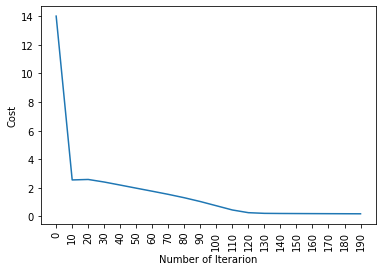

train accuracy: 93.67816091954023 %
test accuracy: 95.16129032258064 %


In [98]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 200)

Aprendemos la lógica detrás de una red neuronal simple (regresión logística) y cómo implementarla.

Ahora que hemos aprendido la lógica, podemos usar la biblioteca sklearn, que es más fácil que implementar todos los pasos con la mano para la regresión logística.

In [45]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


### EJERCICIO!: 

Este es un buen lugar para detenerse y practicar. Tu tarea es crear tu propio método de regresión logística y clasificar dos dígitos diferentes del lenguaje de señas.

-----
-----
## Artificial Neural Network (ANN)

También se llama red neuronal profunda o aprendizaje profundo.

### ¿Qué es la red neuronal? 
Básicamente consiste en tomar la regresión logística y repetirla al menos 2 veces.

En la regresión logística, hay capas de entrada y salida. Sin embargo, en la red neuronal, hay al menos una capa oculta entre la capa de entrada y la de salida.

### ¿Qué es profundo?
para decir "profundo", ¿cuántas capas necesito tener? Cuando le hice esta pregunta a mi maestro, él dijo que "Profundo" es un término relativo; por supuesto, se refiere a la "profundidad" de una red, es decir, cuántas capas ocultas tiene. 

### ¿Qué profundidad tiene su piscina?
Podría ser de 5 METROS o podría ser de 2 METROS, sin embargo, todavía tiene una profundidad, tiene la cualidad de "profundidad" asociada... no?. 

Hace años, dos o tres capas ocultas era el **límite** para el hardware especializado del día. Hace solo unos años, 20 capas se consideraban bastante profundas. En octubre de 2019 (aprox), [Andrew Ng](https://es.wikipedia.org/wiki/Andrew_Ng) mencionó que 152 capas eran (¿una de?) las redes comerciales más grandes que conocía. 

### ¿Por qué se llama oculta? 

Porque la capa oculta no ve entradas (conjunto de entrenamiento)...
Por ejemplo, tiene capas de entrada, una oculta y una de salida. Cuando alguien te pregunta "oye , ¿cuántas capas tiene tu red neuronal?" La respuesta es "Tengo una red neuronal de 2 capas". Porque al calcular el número de capa, se ignora la capa de entrada.

![img](https://preview.ibb.co/dajVyH/9.jpg)

### Red neuronal de 2 capas

* Tamaño de las capas y ponderaciones y sesgos de los parámetros de inicialización
* Propagación hacia adelante
* Función de pérdida y función de coste
* Propagación hacia atrás
* Actualizar parámetros
* Predicción con peso y sesgo de parámetros aprendidos
* Crear modelo

Tamaño de las capas y ponderaciones y sesgos de los parámetros de inicialización

Para x_train que tiene una muesra X de 348 "imágenes":

$$z^{[1] (348)} = W^{[1]} x^348 + b^{[1] (348)}$$

$$a^{[1] (348)} = tanh (z^{[1] (348)})$$

$$z^{[2](348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$

$$\hat{y}^(348) = a^{[2] (348)} = σ (z^{[2] (348)})$$

En la regresión logística, inicializamos los pesos 0.01 y el sesgo 0. En este momento, inicializamos los pesos de forma aleatoria. Porque si inicializamos los parámetros a cero, cada neurona de la primera capa oculta realizará la misma comptación. Por lo tanto, incluso después de múltiples iteraciones de descenso gradual, cada neurona de la capa calculará las mismas cosas que otras neuronas. Por tanto, inicializamos aleatoriamente. También los pesos iniciales serán pequeños. Si son muy grandes inicialmente, esto hará que las entradas del $tanh$ sean muy grandes, lo que provocará que los gradientes sean cercanos a cero. El algoritmo de optimización será lento.

El sesgo puede ser cero inicialmente.

In [99]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [100]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [101]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [102]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [103]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [104]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.379108
Cost after iteration 100: 0.357196
Cost after iteration 200: 0.345567
Cost after iteration 300: 0.327103
Cost after iteration 400: 0.306853
Cost after iteration 500: 0.271031
Cost after iteration 600: 0.230357
Cost after iteration 700: 0.194162
Cost after iteration 800: 0.168133
Cost after iteration 900: 0.144020
Cost after iteration 1000: 0.128532
Cost after iteration 1100: 0.112390
Cost after iteration 1200: 0.099257
Cost after iteration 1300: 0.088169
Cost after iteration 1400: 0.078835
Cost after iteration 1500: 0.071173
Cost after iteration 1600: 0.064928
Cost after iteration 1700: 0.059762
Cost after iteration 1800: 0.055413
Cost after iteration 1900: 0.051699
Cost after iteration 2000: 0.048487
Cost after iteration 2100: 0.045675
Cost after iteration 2200: 0.043179
Cost after iteration 2300: 0.040927
Cost after iteration 2400: 0.038845


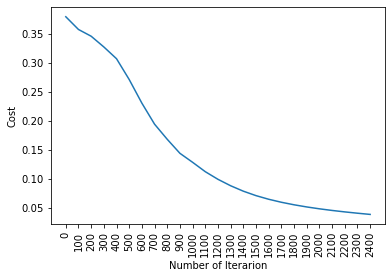

train accuracy: 99.71264367816092 %
test accuracy: 96.7741935483871 %


In [105]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

### Algunos links de interés

[1](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)
[2](https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners)